In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("yellow_tripdata_2024-01_sample.csv",
                 parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

print("Shape:", df.shape)
print(df.head())


Shape: (20000, 13)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2024-01-03 18:24:00   2024-01-03 19:19:00                3   
1         2  2024-01-24 23:49:00   2024-01-25 00:17:00                1   
2         2  2024-01-21 07:00:00   2024-01-21 07:04:00                1   
3         1  2024-01-14 14:31:00   2024-01-14 14:33:00                1   
4         1  2024-01-14 10:09:00   2024-01-14 10:12:00                1   

   trip_distance  PULocationID  DOLocationID store_and_fwd_flag payment_type  \
0          5.231            94           247                  N          DIS   
1          3.758           223           203                  N          CSH   
2          2.219           200            97                  N          CSH   
3          6.808           150            90                  N          CRD   
4          2.641           237           146                  N          CRD   

   fare_amount  tip_amount  extra  total_amount  

In [3]:
# Trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Hour of day from pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Keep useful columns
data = df[['passenger_count','trip_distance','trip_duration','pickup_hour','fare_amount']].dropna()
print(data.head())


   passenger_count  trip_distance  trip_duration  pickup_hour  fare_amount
0                3          5.231           55.0           18        14.70
1                1          3.758           28.0           23        11.66
2                1          2.219            4.0            7         7.05
3                1          6.808            2.0           14        18.52
4                1          2.641            3.0           10         8.87


In [4]:
X = data[['passenger_count','trip_distance','trip_duration','pickup_hour']]
y = data['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [6]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.745177920636274
R2 Score: 0.9805635118695023


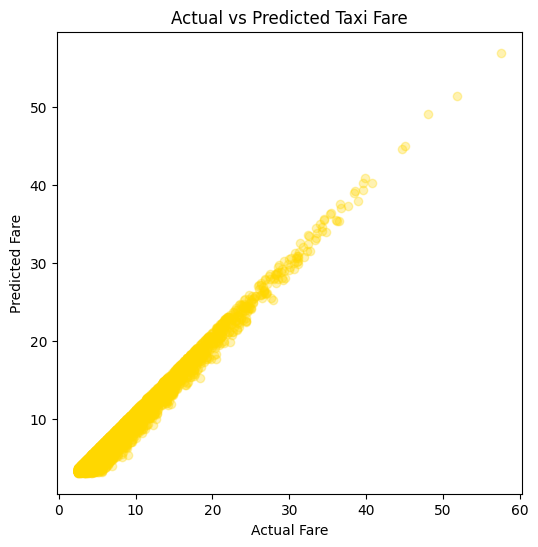

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3,color = "gold")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Taxi Fare")
plt.show()
